*0930 파이썬 머신러닝 완벽 가이드 p.145~p.180*

# **CHAPTER 03. 평가**

<분류의 성능 평가 지표>
- 정확도
- 오차행렬
- 정밀도
- 재현율
- F1 스코어
- ROC AUC


---



이진 분류: 긍정/ 부정과 같이 2개의 결괏값을 가짐

멀티 분류: 여러 개의 결정 클래스 값을 가짐

---




> **01. 정확도**

정확도 = (예측 결과가 동일한 데이터 건수) / (전체 예측 데이터 건수)

In [4]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit 메서드는 학습x
    def fit(self, X, y=None):
        pass

    # predict 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred

In [5]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [6]:
from re import X
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
from google.colab import files
uploaded = files.upload()

titanic_df = pd.read_csv('titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Saving titanic_train.csv to titanic_train (1).csv
Dummy Classifier의 정확도는: 0.7877


<ipython-input-5-984a01c54c3e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-5-984a01c54c3e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [7]:
# 불균형한 데이터 세트에 정확도 지표 적용 시 발생할 수 있는 문제

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환
# 7번이 아니면 False이고 0으로 변환

y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [8]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.900




> **02. 오차 행렬**

이진 분류의 예측 오류가 얼마인지 & 어떤 유형인지를 나타내는 지표

-  TN는 예측값을 Negative 값 0으로 예측했고 실제 값 역시 Negative 값 0
-  FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
- FN은 예측값을 Negative값 0으로 예측했는데 실제 값은 Positive 값 1
- TP는 예측값을 Positive값 1로 예측했는데 실제 값 역시 Positive 값 1


In [9]:
# 사이킷런은 오차 행렬을 구하기 위해 confusion_matrix() API를 제공
# MyFakeClassifier의 예측 성능 지표를 오차 행렬로 표현
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)
# MyFakeClassifier의 예측 결과인 fakepred와 실제 결과인 y_test를 confusion_matrix()의 인자로 입력

array([[405,   0],
       [ 45,   0]])

- 출력된 오차 행렬은 ndarray 형태
- 이진 분류의 TN, FP, FN, FP는 상단 도표와 동일한 위치
를 가지고 array에서 가져올 수 있음.
- TN은 array[O,0]로 405, FP는 array[O,1]로 0, FN은
array[1,0]로 45, TP는 array[1,1]로 0에 해당


---


- 테스트 데이터 세트의 클래스 값 분포는 0이 405건, 1이
45건
- 따라서 TN은 전체 450건 데이터 중 무조건 Negative 0으로 예측해서 True가 된 결과 405건 / FP는
Positive 1로 예측한 건수가 없으므로 0건 / FN은 Positive 1인 건수 45건을 Negative로 예측해서 False가 된 결과 45건 / TP는 Positive 1로 예측한 건수가 없으므로 0건.


---

TP, TN, FP, TN 값을 조합해 Classifier의 성능을 측정할 수 있는 주요 지표인 정확도(Accuracy), 정밀도(Precision), 재현
율(Recall) 값을 알 수 있음.

**<오차 행렬상에서 정확도>**

**정확도**

**= 예측 결과와 실제 값이 동일한 건수/전체 데이터 수**

**= (TN + TP)/(TN + FP + FN + TP)**

일반적으로 이러한 불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의 결괏값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0 값을 부여하는 경우가 많음.

불균형한 이진 분류 데이터 세트에서는 Positive 데이터 건수가 매우 작기 때문에 데이터에 기반한 ML 알고리즘은 Positive보다는 Negative로 예측 정확도가 높아지는 경향이 발생함.

-> Negative로 예측하는 경향이 더 강해져서 TN은 매우 커지고 TP는 매우 작아지게 됨. & Negative로 예측할 때 정확도가 높기 때문에
FN(Negative로 예측할 때 틀린 데이터 수)이 매우 작고, Positive로 예측하는 경우가 작기 때문에 FP 역시 매우 작아짐.

-> 정확도 지표는 비대칭한 데이터 세트에서 Positive에 대한 예측 정확도를 판단하지 못한 채 Negative에 대한 예측 정확도만으로도 분류의 정확도가 매우 높게 나타나는 수치적인 판단 오류를 일으키게 됨.



---



> **03. 정밀도와 재현율**

- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표.
- MyFakeClassifier는 Positive로 예측한 TP 값이 하나도 없기 때문에 정밀도와 재현율 값이 모두 0.


---


**정밀도 = TP / (FP + TP)**

예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율 (양성 예측도)

-

**재현율 = TP / (FN + TP)**

실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

(민감도(Sensitivity) 또는 TPR(True Positive
Rate))



---

**재현율이 중요 지표인 경우**

: 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우

1.  암 판단 모델

실제 Positive인 암 환자를 Positive 양성이 아닌 Negative 음성으로 잘못 판단했을 경우 오류의 대가가 생명을 앗아갈 정도로 심각함. 반면에 실제 Negative인 건강한 환자를 암 환자인 Positive로 예측한 경우면 다시 한번 재검사를 하는 수준의 비용이 소모될 것임.

2. 보험 사기

실제 금융거래 사기인 Positive 건을 Negative로 잘못 판단하게 되면 회사에 미치는 손해가 클 것임. 반면에 정상 금융거래인 Negative를 금융사기인 Positive로 잘못 판단하더라도 다시 한번 금융사기인지 재확인하는 절차를 가동하면 됨.

-

**정밀도가 중요 지표인 경우**

: 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되
면 업무상 큰 영향이 발생하는 경우

1. 스팸메일 여부를 판단하는 모델

실제 Positive인 스팸 메일을 Negative인 일반 메일로 분류하더라도 사용자가 불편함을 느끼는 정도이지만, 실제 Negative인 일반 메일을
Positive인 스팸 메일로 분류할 경우에는 메일을 아예 받지 못하게 됨.



---


사이킷런은 정밀도 계산을 위해 precision_score()를, 재현율 계산을 위해 recall_score()를 API로 제공


In [10]:
# get_clf_eval() 함수 만들기

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [11]:
## 로지스틱 회귀 기반으로 타이타닉 생존자를 예측하고 confusion matrix, accuracy, precision, recall 평가 수행

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할
from google.colab import files
uploaded = files.upload()

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')
# LogisticRegression 객체의 생성 인자로 입력되는 'solver—liblinear': 로지스틱 회귀의 최적화 알고리즘 유형을 지정

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

Saving titanic_train.csv to titanic_train (2).csv
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


<ipython-input-5-984a01c54c3e>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
<ipython-input-5-984a01c54c3e>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

- solver의 기본값은 Ibfgs이며 데이터 세트가 상대적으로 크고 다중 분류인 경우 적합함.
- 보통 작은 데이터 세트의 이진 분류인 경우 solver는 liblinear가 약간 성능이 좋은 경향이 있음.



---


**정밀도/재현율 트레이드오프**

- 정밀도 또는 재현율이 특별히 강조돼야 할 경우 -> 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음.
- 한 쪽을 강제로 높이면 다른 하나의 수치는 떨어지기 쉽기 때문에 이를 정밀도/재현율의 트레이드오프(Trade-off)라고 부름.

- 일반적으로 이진 분류에서는 임곗값을 0.5, 즉 50%로 정하고 이 기준값보다 확률이 크면 Positive, 작으면 Negative로 결정

predict_proba( ): 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환

이진 분류에서 predict_proba()를 수행해 반환되는 ndarray는 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 칼럼이 클래스 값 1에 대한 예측 확률임.

In [12]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 Shape: {0}'.format(pred_proba.shape))
print('pred_proba array 에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합하여 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba()결과 Shape: (179, 2)
pred_proba array 에서 앞 3개만 샘플로 추출 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


- 이진 분류에서 predict_proba()를 수행해 반환되는 ndarray는 첫 번째 칼럼이 클래스 값 0에 대한 예측 확률, 두 번째 칼럼이 클래스 값 1에 대한 예측 확률임.
-두 개의 칼럼 중에서 더 큰 확률 값으로 predict() 메서드가 최종 예측함.




---

사이킷런의 predict( ): predict_proba( ) 메서드가 반환하는 확률 값을 가진 ndarray에서 정해진 임곗값(바로 앞에서는 0.5였음)을 만족하는 ndarray의 칼럼 위치를 최종 예측 클래스로 결정

-> 사이킷런의 Binarizer 클래스로 구현!

In [13]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
     [2,0,0],
     [0,1.1,1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [15]:
## Binarizer를 이용해 사이킷런 predict()의 의사(pseudo) 코드를 만들기

from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값=분류 결정 임곗값
custom_threshold = 0.5

# predict_proba( ) 반환값의 두 번째 칼럼, 즉 Positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [16]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤

custom_threshold = 0.4
pre_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197


**임곗값을 낮추니 재현율 값이 올라가고 정밀도가 떨어짐.**

->이유:

-분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준.

-확률이 0.5가 아닌 0.4부터 Positive로, 예측을 더 너그럽게 하기 때문에 임곗값 값을 낮출수록 True 값이 많아지게 됨.

-Positive 예측값이 많아지면 상대적으로 재현율 값이 높아짐. 양성 예측을 많이 하면 실제 양성을 음성으로 예측하는 횟수가 상대적으로 줄어들기 때문!



---


임곗값이 0.5에서 0.4로 낮아지면서

**TP가 47에서 50으로 늘었고 FN이 14에서 11로 줄어듦.**

-재현율이 0.770에서 0.820으로 늘어남.

**FP는 10에서 21로 늘어남.**

-정밀도가 0.825에서 0.704로 많이 나빠짐.

-정확도가 0.866에서 0.821로 나빠짐.

In [17]:
## 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사

# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.40, 0.45, 0.50, 0.55, 0.60]

# get_eval_by_threshold() 함수 만들기
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


사이킷런은 이와 유사한
precision_recall_curve() API를 제공

입력값:

1. y_true: 실제 클래스값 배열 (배열 크기=데이터 건수)
2. probas_pred: Positive 칼럼의 예측 확률 배열 (배열 크기=데이터 건수)

반환값:

1. 정밀도
2. 재현율

In [18]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

# 15 Steps 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print('샘플 임곗값 별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임곗값 별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임곗값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임곗값 별 정밀도: [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임곗값 별 재현율: [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


- 추출된 임곗값 샘플 10개에 해당하는 정밀도 값과 재현율 값을 살펴보면 임곗값이 증가할수록 정밀도 값은 동시에 높아지나 재현율 값은 낮아짐을 알 수 있음.

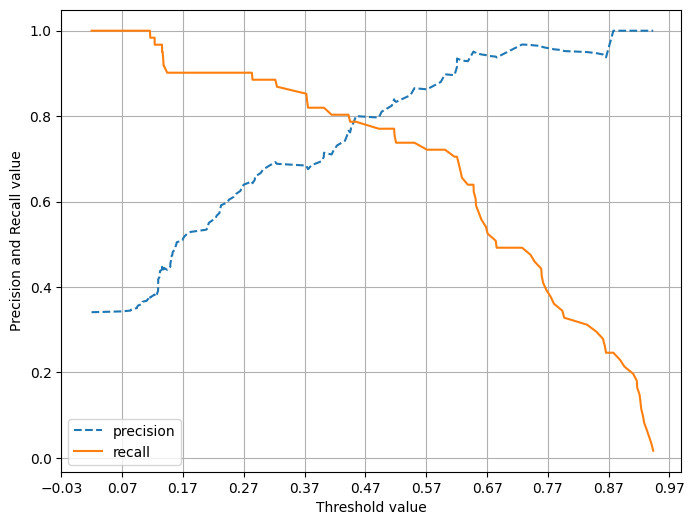

In [19]:
from ast import increment_lineno
## API를 이용해 정밀도와 재현율 곡선 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    # X축을 threshold값으로, Y축을 종밀도, 재현도 값으로 각각 Plot 수행.
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')

    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

- 임곗값이 낮을수록 많은 수의 양성 예측으로 인해 재현율 값이 극도로 높아지고 정밀도 값이 극도로 낮아짐.
- 임곗값을 계속 증가시킬수록 재현율 값이 낮아지고 정밀도 값이 높아지는 반대의 양상이 됨.



---

# **정밀도와 재현율의 맹점**

임곗값의 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 함.

-

***정밀도가 100%가 되는 방법***

정밀도 = TP /(TP + FP)

확실한 기준이 되는 경우만 Positive로 예측하고 나머지는 모두 Negative로 예측

전체 환자 1000명 중 확실한 Positive 징후만 가진 환자는 단 1 명이
라고 하면 이 한 명만 Positive로 예측하고 나머지는 모두 Negative로 예측하더라도 FP는 0, TP는 1
이 되므로 정밀도는 1/(1+0)으로 100%가 됨.

-

***재현율이 100%가 되는 방법***

모든 환자를 Positive로 예측.

재현율 = TP /(TP 十 FN)

전체 환자 1000명을 다
Positive로 예측하면, 이 중 실제 양성인 사람이 30명 정도라도 TN이 수치에 포함되지 않고 FN은 아예 0이므로 30/(30 + 0)으로 100%가 됨.



---



> **04. F1 스코어**

F1 스코어(Score)는 정밀도와 재현율을 결합한 지표로, 정밀도와 재현율이 어느 한
쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가짐.

사이킷런은 F1 스코어를 구하기 위해 fl_score()라는 API를 제공

In [20]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [21]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)

    # f1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)

    # f1 스코어 프린트 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값: 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값: 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값: 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값: 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000




> **05. ROC 곡선과 AUC**

- ROC 곡선: FPR(False Positive Rate) 이 변할 때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선. FPR을 X 축으로, TPR을 Y축으로 잡으면
FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타남.

-민감도(TPR, 재현율)는 실제값 Positive(양성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 있는 사람은 질병이 있는 것으
로 양성 판정).

-특이성(TNR)은 실제값 Negative(음성)가 정확히 예측돼야 하는 수준을 나타냄(질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)

TPR = TP / ( FN + TP)

TNR = TN / ( FP + TN ).

FPR = FP / (FP + TN) = 1 - TNR = 1- 특이성

*FPR을 0으로 만들려면 임곗값을 1로 지정

*FPR을 1로 만들려면 TN을 0으로, TN을 0으로 만들려면 분류 결정 임곗값을 0으로 지정

->이렇게 임곗값을 1부터 0까지 변화시키면서 FPR을 구하고 이 FPR 값의 변화에 따른 TPR 값을 구하는 것이 ROC 곡선


---


사이킷런은 ROC 곡선을 구하기 위해 roc_curve() API를 제공

<입력값>
1. y_true: 실제 클래스 값 array ( array shape = [데이터 건수])
2. y_score: predict_proba()의 반환 값 array에서 Positive 칼럼의 예측 확률이 보통 사용됨. array, shape = [n_samples]

<반환값>
1. fpr: fpr 값을 array로 반환
2. tpr: tpr 값을 array로 반환
3. thresholds: threshold 값 array

In [23]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일 때의 예측 확률 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 입곗값 배열에서 샘플로 데이터 추출, 임곗값을 5 Steps로 추출
# thresholds[0]은 max(예측 확률)+1로 임의 설정. 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

# 5 Steps로 추출된 임곗값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값: [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR: [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR: [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


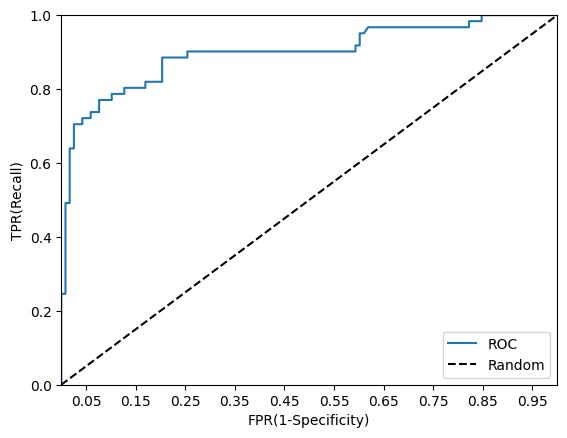

In [26]:
# FPR의 변화에 따른 TPR의 변화를 ROC 곡선으로 시각화

def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)

    # ROC 곡선을 그래프로 시각화
    plt.plot(fprs, tprs, label='ROC')

    # 가운데 직선 그림
    plt.plot([0,1], [0,1], 'k--', label='Random')

    #FPR X축의 Scale을 0.1 단위로 변경, X축, Y축명 설정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR(1-Specificity)'); plt.ylabel('TPR(Recall)')
    plt.legend()

roc_curve_plot(y_test, pred_proba[:,1])

- AUC(Area Under Curve) 값: ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치

In [27]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [28]:
## get_clf_eval() 함수에 roc_auc_score()를 이용해 ROC AUC값을 측정하는 로직 추가
## ROC AUC는 예측 확률값을 기반으로 계산됨.
## 이를 get_clf_eval() 함수의 인자로 받을 수 있도록 get_clf_eval(y_test, pred=None, pred_proba=None)로 함수형 변경

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))



> **06. 피마 인디언 당뇨병 예측**





In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [31]:
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


- 전체 768개의 데이터 중에서 Negative 값 0이 500개, Positive 값 1이 268개로 Negative가 상대적으로 많음.

In [33]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Null 값은 없으며 피처의 타입은 모두 숫자형.

In [34]:
# 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출.
# 맨 끝이 Outcome 칼럼으로 레이블 값임. 칼럼 위치 -1 을 이용해 추출.

X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

# 로지스킥 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[87 13]
 [22 32]]
정확도: 0.7727, 정밀도: 0.7111, 재현율: 0.5926, F1:0.6465, AUC:0.8083


<전체 데이터의 65%가 Negative이므로 정확도보다는 재현율 성능에 조금 더 초점>

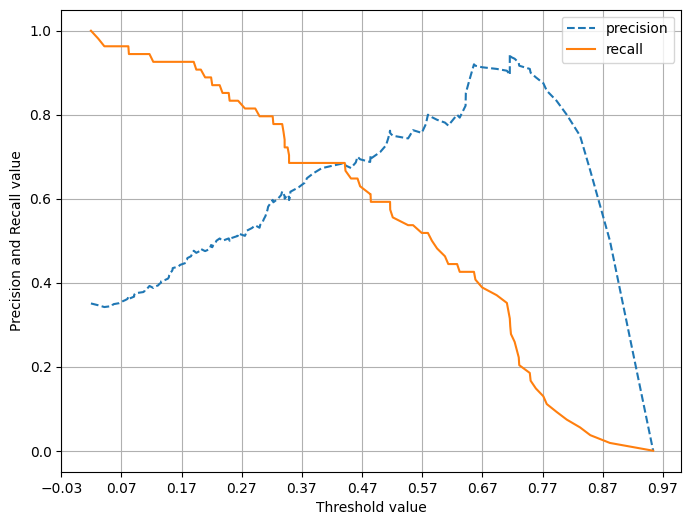

In [35]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test,pred_proba_c1)

In [36]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- min() 값이 0으로 돼 있는 피처가 상당히 많음.

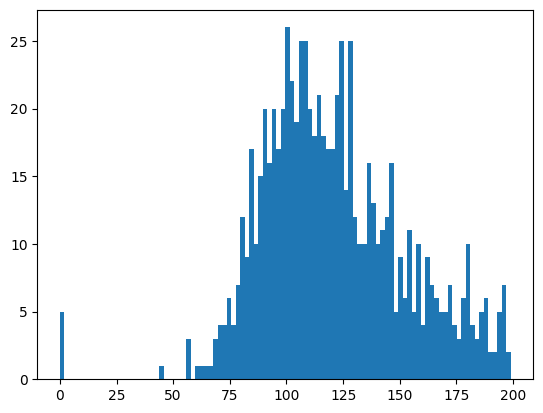

In [38]:
pit.hist(diabetes_data['Glucose'], bins=100)
plt.show()

<min() 값이 0으로 돼 있는 피처에 대해 0 값의 건수 및 전체 데이터 건수 대비 몇 퍼센트의 비율로 존재하는지 확인>

In [39]:
# 0값을 검사할 피처명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 0값 개수 추출, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f}%'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65%
BloodPressure 0 건수는 35, 퍼센트는 4.56%
SkinThickness 0 건수는 227, 퍼센트는 29.56%
Insulin 0 건수는 374, 퍼센트는 48.70%
BMI 0 건수는 11, 퍼센트는 1.43%


In [40]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체

mean_zero_features = diabetes_data[zero_features].mean()
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, mean_zero_features)

In [45]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

# 로지스틱 회귀로 학습, 예측, 평가 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1:0.6804, AUC:0.8433


In [52]:
## 임곗값을 0.3에서 0.5까지 0.03씩 변화시키면서 재현율과 다른 평가 지표의 값 변화 출력

thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds list객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[67 33]
 [11 43]]
정확도: 0.7143, 정밀도: 0.5658, 재현율: 0.7963, F1:0.6615, AUC:0.8433
임곗값: 0.33
오차 행렬
[[72 28]
 [12 42]]
정확도: 0.7403, 정밀도: 0.6000, 재현율: 0.7778, F1:0.6774, AUC:0.8433
임곗값: 0.36
오차 행렬
[[76 24]
 [15 39]]
정확도: 0.7468, 정밀도: 0.6190, 재현율: 0.7222, F1:0.6667, AUC:0.8433
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, F1:0.6667, AUC:0.8433
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, F1:0.6792, AUC:0.8433
임곗값: 0.45
오차 행렬
[[85 15]
 [18 36]]
정확도: 0.7857, 정밀도: 0.7059, 재현율: 0.6667, F1:0.6857, AUC:0.8433
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1:0.6931, AUC:0.8433
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, F1:0.6804, AUC:0.8433


- 임곗값 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 향상시키는 좋은 임곗값으로 보임.

In [53]:
# 임곗값을 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 칼럼값을 Binarizer 변환
pred_th_048 = binarizer.fit_transform(pred_proba[:,1].reshape(-1,1))

get_clf_eval(y_test, pred_th_048, pred_proba[:,1])

오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1:0.6931, AUC:0.8433




> **07. 정리**

-분류에 사용되는 정확도, 오차 행렬, 정밀도, 재현율, F1 스코어, ROC-AUC와 같은 성능 평가 지표를 살펴봄.

-**오차 행렬**은 Negative와 Positive 값을 가지는 실제 클래스 값과 예측 클래스 값이 True와 False에 따라 TN, FP, FN, TP로 매핑되는 4분면 행렬을 기반으로 예측 성능을 평가

-**정확도, 정밀도, 재현율** 수치는 TN, FP, FN, TP 값을 다양하게 결합해 만들어지며, 이를 통해 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있음.

-**정밀도(Precision)와 재현율(Recall)**은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표

-**F1 스코어**는 정밀도와 재현율을 결합한 평가 지표이며, 정밀도와 재현율이 어느 한 쪽으로 치우치지 않을 때 높은 지표값을 가지게 됨.

-**ROC-AUC**는 일반적으로 이진 분류의 성능 평가를 위해 가장
많이 사용되는 지표.

-**AUC(Area Under Curve) 값**은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치.